## Qubit Partition

<font size = 4> 
    
This notebook demonstrate how qubits are allocated manually. This notebook is for unit testing for ```def select_vertices()```, ```def remove_connectivity()``` and ```def reconnect_nodes()```. <font color = 'red'>This code snippet is particularly useful for testing qubit mapping algorithms. </font><br>

In [1]:
from QCloud import *
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from utility_functions import select_vertices, remove_connectivity, reconnect_nodes

First selected vertices: (0, 1, 4, 2)
Second selected vertices: (7, 6, 10)
Third selected vertices: (3, 5, 8, 9, 11, 14, 13, 12, 15)


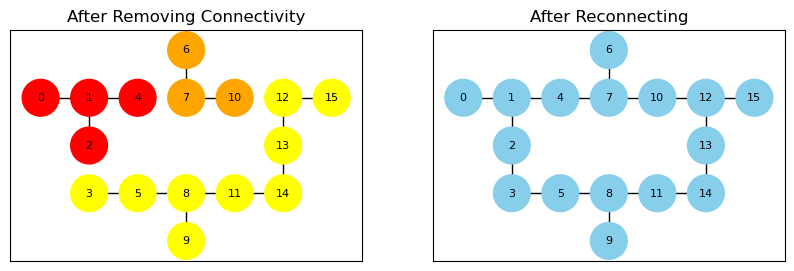

In [2]:
env = simpy.Environment()
ibm_guadalupe = IBM_guadalupe(env)

# First selection
N1 = 4
selected_vertices1 = select_vertices(ibm_guadalupe, N1, 1)
remove_connectivity(ibm_guadalupe, selected_vertices1, 'red')

# Second selection on the remaining graph
N2 = 3
selected_vertices2 = select_vertices(ibm_guadalupe, N2, 2)
remove_connectivity(ibm_guadalupe, selected_vertices2, 'orange')
    
# # Second selection on the remaining graph
N3 = 9
selected_vertices3 = select_vertices(ibm_guadalupe, N3, 3)
remove_connectivity(ibm_guadalupe, selected_vertices3, 'yellow')

print(f"First selected vertices: {selected_vertices1}")
print(f"Second selected vertices: {selected_vertices2}")
print(f"Third selected vertices: {selected_vertices3}")

# Visualize the graph before and after reconnecting
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot after removing connectivity
axs[0].set_title('After Removing Connectivity')
nx.draw_networkx(ibm_guadalupe.graph, ibm_guadalupe.pos, node_color = ibm_guadalupe.color_map, with_labels=True, node_size=700, font_size=8, ax=axs[0])

# Reconnect the nodes using the original edges

reconnect_nodes(ibm_guadalupe, selected_vertices1)
reconnect_nodes(ibm_guadalupe, selected_vertices2)
reconnect_nodes(ibm_guadalupe, selected_vertices3)

# Plot after reconnecting
axs[1].set_title('After Reconnecting')
nx.draw_networkx(ibm_guadalupe.graph, ibm_guadalupe.pos, node_color= ibm_guadalupe.color_map, with_labels=True, node_size=700, font_size=8, ax=axs[1])
plt.show()

<font>
Questions to ask:<br>
(1) How are we selecting the qubits efficiently? Let's take a look at the example of qubit partition on ibm_guadalupe.<br><br>    
Rule(1): 
Required qubits for a circuit has to be connected. If a circuit required 3 qubits, the selected cubits should be (0-1-4). A bad example is (4-6-10), since non of those are connected. <br><br> 
Rule(2):
After qubits are mapped for a circuit, the remaining number of subgraphs must be minimum. For example, if a circuit required 4 qubits, a good qubit selection is (0-1-4-2) or (0-1-2-3). A bad qubit selection is (0-1-4-7) because that will seperate qubit no. 6 and leave two sub groups of remaining physical qubit. <br><br>
Another example is, for an eight qubit selection, a good choice is (0-1-4-7-10-12-15-6). A bad choice is (0-1-4-7-2-3-5-8) because it split the connectivity into three sub-groups. <br><br>
Solution: To solve the problem of selecting N connected vertices while minimizing the remaining subgraphs, we can use a combination of depth-first search (DFS) to ensure connectivity and a heuristic to minimize subgraph formation. Here's how you can approach the problem:<br><br>
Ensure Connectivity: Use DFS or BFS to explore connected components and select N vertices.
Minimize Subgraphs: Keep track of the number of subgraphs formed by remaining vertices and aim to minimize this.
</font>

## The Optimal Solution

Let's think about the brute force algorithm. To find the optimal qubit partition, we need to iterate through all the possible combinations of the nodes. The number of combinations is calculated using "n choose k". For example, if we want to select 5 qubits out of 72 available qubits, the number of ways to select 5 nodes from 72 nodes is given by the formula:

$$ C(n, k) = \frac{n!}{k!(n-k)!} $$

That is:

$$ C(72, 5) = 13,991,544 $$

This results in an enormous number of combinations. It is very inefficient in pratical computing. 

To address this, we implement `def select_vertices_fast()`. While this API does not guarantee the best qubit partition, it avoids iterating through every possible combination. The API uses Depth Firth Search (DFS) algorithm for qubit partition. 


First selected vertices: [0, 1, 2, 5, 6]
Second selected vertices: [8, 12, 13, 7]
Third selected vertices: [10, 11, 15, 16, 17, 18]


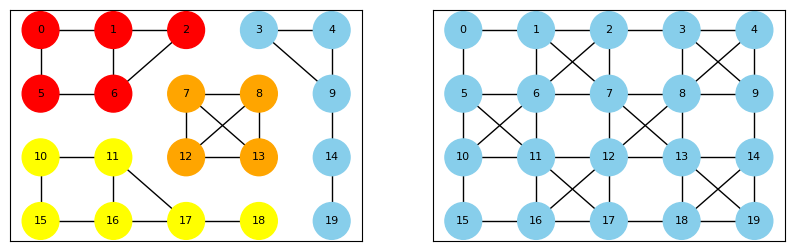

In [3]:
ibm_tokyo = IBM_tokyo(env)

# First selection
N1 = 5
selected_vertices1 = select_vertices_fast(ibm_tokyo, N1, 1)
remove_connectivity(ibm_tokyo, selected_vertices1, 'red')

# Second selection on the remaining graph
N2 = 4
selected_vertices2 = select_vertices_fast(ibm_tokyo, N2, 2)
remove_connectivity(ibm_tokyo, selected_vertices2, 'orange')
    
# # Second selection on the remaining graph
N3 = 6
selected_vertices3 = select_vertices_fast(ibm_tokyo, N3, 3)
remove_connectivity(ibm_tokyo, selected_vertices3, 'yellow')

print(f"First selected vertices: {selected_vertices1}")
print(f"Second selected vertices: {selected_vertices2}")
print(f"Third selected vertices: {selected_vertices3}")

# Visualize the graph before and after reconnecting
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot after removing connectivity
axs[0].set_title('')
nx.draw_networkx(ibm_tokyo.graph, ibm_tokyo.pos, node_color = ibm_tokyo.color_map, with_labels=True, node_size=700, font_size=8, ax=axs[0])

# Reconnect the nodes using the original edges

reconnect_nodes(ibm_tokyo, selected_vertices1)
reconnect_nodes(ibm_tokyo, selected_vertices2)
reconnect_nodes(ibm_tokyo, selected_vertices3)

# Plot after reconnecting
axs[1].set_title('')
nx.draw_networkx(ibm_tokyo.graph, ibm_tokyo.pos, node_color= ibm_tokyo.color_map, with_labels=True, node_size=700, font_size=8, ax=axs[1])
plt.show()


First selected vertices: [0, 1, 2, 4]
Second selected vertices: [6, 7, 10, 11, 12, 13, 14, 15, 16, 18]
Third selected vertices: [21, 22, 23, 24, 25, 26]


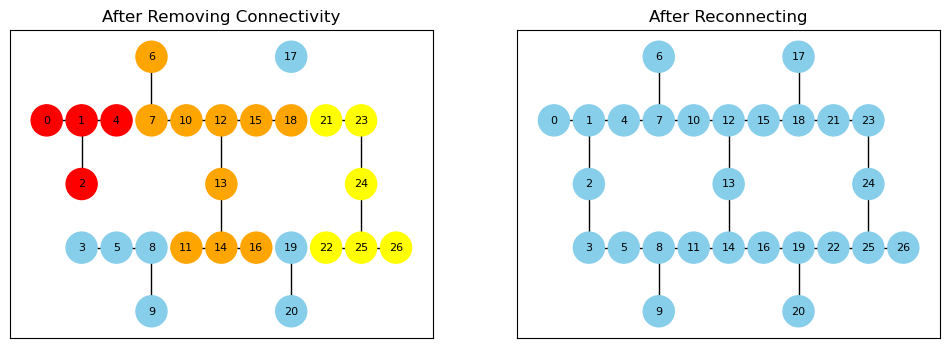

In [4]:
ibm_montreal = IBM_montreal(env)

N1, N2, N3 = 4, 10, 6

# First selection
selected_vertices1 = select_vertices_fast(ibm_montreal, N1, 1)
remove_connectivity(ibm_montreal, selected_vertices1, 'red')

# Second selection on the remaining graph
selected_vertices2 = select_vertices_fast(ibm_montreal, N2, 2)
remove_connectivity(ibm_montreal, selected_vertices2, 'orange')
    
# # Second selection on the remaining graph
selected_vertices3 = select_vertices_fast(ibm_montreal, N3, 3)
remove_connectivity(ibm_montreal, selected_vertices3, 'yellow')

print(f"First selected vertices: {selected_vertices1}")
print(f"Second selected vertices: {selected_vertices2}")
print(f"Third selected vertices: {selected_vertices3}")

# Visualize the graph before and after reconnecting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot after removing connectivity
axs[0].set_title('After Removing Connectivity')
nx.draw_networkx(ibm_montreal.graph, ibm_montreal.pos, node_color = ibm_montreal.color_map, with_labels=True, node_size=500, font_size=8, ax=axs[0])

# Reconnect the nodes using the original edges

reconnect_nodes(ibm_montreal, selected_vertices1)
reconnect_nodes(ibm_montreal, selected_vertices2)
reconnect_nodes(ibm_montreal, selected_vertices3)

# Plot after reconnecting
axs[1].set_title('After Reconnecting')
nx.draw_networkx(ibm_montreal.graph, ibm_montreal.pos, node_color= ibm_montreal.color_map, with_labels=True, node_size=500, font_size=8, ax=axs[1])
plt.show()

First selected vertices: [0, 1, 2, 3, 4, 5, 10, 11, 13, 14, 15, 16, 17, 24]
Second selected vertices: [33, 6, 7, 8, 9, 12, 18, 19, 20, 21, 22, 23, 25, 26]
Third selected vertices: [32, 38, 27, 28, 29, 30, 31]


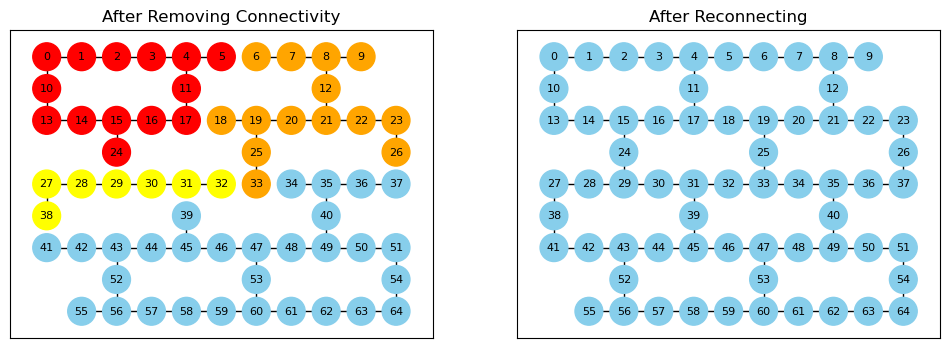

In [5]:
ibm_hummingbird = IBM_hummingbird(env)

N1, N2, N3 = 14, 14, 7

# First selection
selected_vertices1 = select_vertices_fast(ibm_hummingbird, N1, 1)
remove_connectivity(ibm_hummingbird, selected_vertices1, 'red')

# Second selection on the remaining graph
selected_vertices2 = select_vertices_fast(ibm_hummingbird, N2, 2)
remove_connectivity(ibm_hummingbird, selected_vertices2, 'orange')
    
# # Second selection on the remaining graph
selected_vertices3 = select_vertices_fast(ibm_hummingbird, N3, 3)
remove_connectivity(ibm_hummingbird, selected_vertices3, 'yellow')

print(f"First selected vertices: {selected_vertices1}")
print(f"Second selected vertices: {selected_vertices2}")
print(f"Third selected vertices: {selected_vertices3}")

# Visualize the graph before and after reconnecting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot after removing connectivity
axs[0].set_title('After Removing Connectivity')
nx.draw_networkx(ibm_hummingbird.graph, ibm_hummingbird.pos, node_color = ibm_hummingbird.color_map, with_labels=True, node_size=400, font_size=8, ax=axs[0])

# Reconnect the nodes using the original edges

reconnect_nodes(ibm_hummingbird, selected_vertices1)
reconnect_nodes(ibm_hummingbird, selected_vertices2)
reconnect_nodes(ibm_hummingbird, selected_vertices3)

# Plot after reconnecting
axs[1].set_title('After Reconnecting')
nx.draw_networkx(ibm_hummingbird.graph, ibm_hummingbird.pos, node_color= ibm_hummingbird.color_map, with_labels=True, node_size=400, font_size=8, ax=axs[1])
plt.savefig("simulation_time_vs_machines.png")
plt.show()

In [ ]:
chimera_dwave = Chimera_dwave_128(env)

N1, N2, N3 = 14, 14, 7

# First selection
selected_vertices1 = select_vertices_fast(chimera_dwave, N1, 1)
remove_connectivity(chimera_dwave, selected_vertices1, 'red')

# Second selection on the remaining graph
selected_vertices2 = select_vertices_fast(chimera_dwave, N2, 2)
remove_connectivity(chimera_dwave, selected_vertices2, 'orange')
    
# # Second selection on the remaining graph
selected_vertices3 = select_vertices_fast(chimera_dwave, N3, 3)
remove_connectivity(chimera_dwave, selected_vertices3, 'yellow')

print(f"First selected vertices: {selected_vertices1}")
print(f"Second selected vertices: {selected_vertices2}")
print(f"Third selected vertices: {selected_vertices3}")

# Visualize the graph before and after reconnecting
fig, axs = plt.subplots(1, 2, figsize=(26, 10))

# Plot after removing connectivity
axs[0].set_title('After Removing Connectivity')
nx.draw_networkx(chimera_dwave.graph, chimera_dwave.pos, node_color = chimera_dwave.color_map, with_labels=True, node_size=400, font_size=8, ax=axs[0])

# Reconnect the nodes using the original edges

reconnect_nodes(chimera_dwave, selected_vertices1)
reconnect_nodes(chimera_dwave, selected_vertices2)
reconnect_nodes(chimera_dwave, selected_vertices3)

# Plot after reconnecting
axs[1].set_title('After Reconnecting')
nx.draw_networkx(chimera_dwave.graph, chimera_dwave.pos, node_color= chimera_dwave.color_map, with_labels=True, node_size=400, font_size=8, ax=axs[1])
plt.show()

First selected vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16]
Second selected vertices: [35, 36, 13, 14, 15, 17, 18, 22, 23, 24, 25, 26, 27, 29]
Third selected vertices: [32, 33, 19, 20, 21, 28, 31]


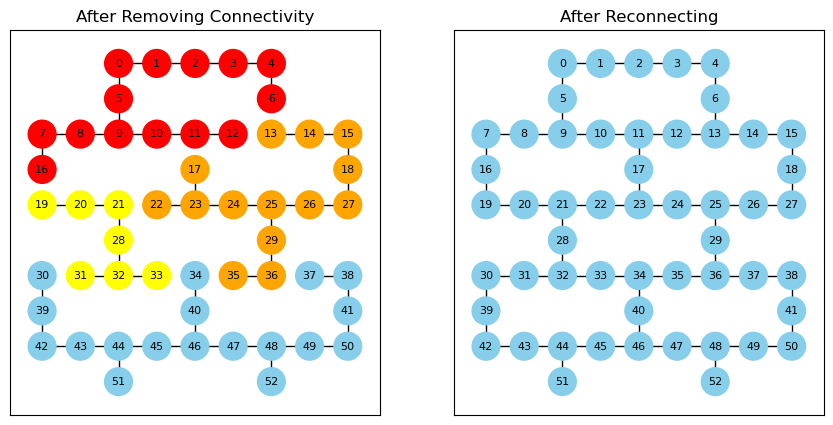

In [10]:
ibm_rochester = IBM_rochester(env)

N1, N2, N3 = 14, 14, 7

# First selection
selected_vertices1 = select_vertices_fast(ibm_rochester, N1, 1)
remove_connectivity(ibm_rochester, selected_vertices1, 'red')

# Second selection on the remaining graph
selected_vertices2 = select_vertices_fast(ibm_rochester, N2, 2)
remove_connectivity(ibm_rochester, selected_vertices2, 'orange')
    
# # Second selection on the remaining graph
selected_vertices3 = select_vertices_fast(ibm_rochester, N3, 3)
remove_connectivity(ibm_rochester, selected_vertices3, 'yellow')

print(f"First selected vertices: {selected_vertices1}")
print(f"Second selected vertices: {selected_vertices2}")
print(f"Third selected vertices: {selected_vertices3}")

# Visualize the graph before and after reconnecting
fig, axs = plt.subplots(1, 2, figsize=(10.5, 5))

# Plot after removing connectivity
axs[0].set_title('After Removing Connectivity')
nx.draw_networkx(ibm_rochester.graph, ibm_rochester.pos, node_color = ibm_rochester.color_map, with_labels=True, node_size=400, font_size=8, ax=axs[0])

# Reconnect the nodes using the original edges

reconnect_nodes(ibm_rochester, selected_vertices1)
reconnect_nodes(ibm_rochester, selected_vertices2)
reconnect_nodes(ibm_rochester, selected_vertices3)

# Plot after reconnecting
axs[1].set_title('After Reconnecting')
nx.draw_networkx(ibm_rochester.graph, ibm_rochester.pos, node_color= ibm_rochester.color_map, with_labels=True, node_size=400, font_size=8, ax=axs[1])
plt.savefig("ibm_rochester.png")
plt.show()

Example number of combinations based on the accquired qubits, if we use brute force algorithm for the best selection. 


| Remaining Qubit | accquired Qubit | formula | num of combinations |
|--------------|--------------|--------------|--------------|
| 72 | 5 | C(72, 5) | 13,991,544 |
| 67 | 3 | C(72, 3) | 59,640 |
| 64 | 7 | C(72,7) | 1,473,109,704 |

